<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/mfilipak/FILIPAK-DATA-SCIENCE/raw/main/DATA/2021_Time_Volume_Price.zip

'wget' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [2]:
!ls

'ls' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
import cv2
import random

In [75]:
df = pd.read_csv("./2021_Time_Volume_Price.zip", index_col=0)
df = df.drop(["MeanPrice", "MinPrice", "MaxPrice", "OpenPrice"], axis=1)

In [76]:
df

,Volume,ClosePrice
Seconds,,
61045175.0,0.0,114590.0
61045176.0,0.0,114590.0
61045177.0,0.0,114590.0
61045178.0,0.0,114590.0
61045179.0,0.0,114590.0
...,...,...
72899705.0,0.0,121200.0
72899706.0,0.0,121200.0
72899707.0,0.0,121200.0


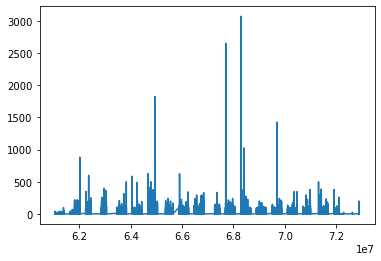

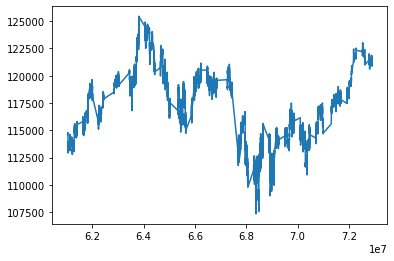

In [77]:
plt.plot(df["Volume"])
plt.show()
plt.plot(df["ClosePrice"])

In [78]:
delta_t = [0]+list(df.index[1:]-df.index[:-1])
df["DELTA_T"] = delta_t


In [79]:
decay = 0.01
mean_volume = [0]
for v in np.array(df["Volume"]):
  mean_volume += [mean_volume[-1]*(1-decay)+decay*v]

decay = 0.00001
mean_price = [df.iloc[0]["ClosePrice"]]
for p in np.array(df["ClosePrice"]):
  mean_price += [mean_price[-1]*(1-decay)+decay*p]




In [80]:
df["MEAN_PRICE"] = mean_price[1:]
df["MEAN_VOLUME"] = mean_volume[1:]
df

,Volume,ClosePrice,DELTA_T,MEAN_PRICE,MEAN_VOLUME
Seconds,,,,,
61045175.0,0.0,114590.0,0.0,114590.000000,0.000000
61045176.0,0.0,114590.0,1.0,114590.000000,0.000000
61045177.0,0.0,114590.0,1.0,114590.000000,0.000000
61045178.0,0.0,114590.0,1.0,114590.000000,0.000000
61045179.0,0.0,114590.0,1.0,114590.000000,0.000000
...,...,...,...,...,...
72899705.0,0.0,121200.0,1.0,118761.903649,1.988666
72899706.0,0.0,121200.0,1.0,118761.928030,1.968779
72899707.0,0.0,121200.0,1.0,118761.952411,1.949092


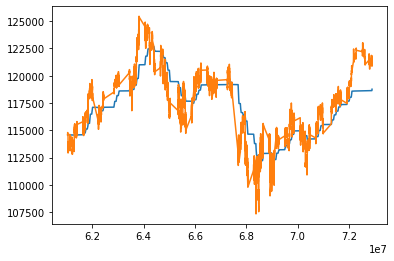

In [81]:
plt.plot(df["MEAN_PRICE"])
plt.plot(df["ClosePrice"])

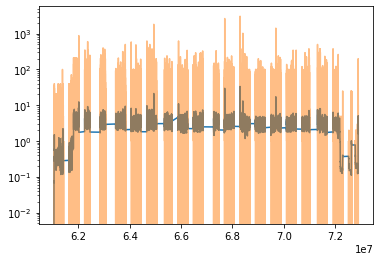

In [82]:
plt.yscale("log")
plt.plot(df["MEAN_VOLUME"])
plt.plot(df["Volume"], alpha=0.5)

In [108]:
df

,Volume,ClosePrice,DELTA_T,MEAN_PRICE,MEAN_VOLUME
Seconds,,,,,
61045175.0,0.0,114590.0,0.0,114590.000000,0.000000
61045176.0,0.0,114590.0,1.0,114590.000000,0.000000
61045177.0,0.0,114590.0,1.0,114590.000000,0.000000
61045178.0,0.0,114590.0,1.0,114590.000000,0.000000
61045179.0,0.0,114590.0,1.0,114590.000000,0.000000
...,...,...,...,...,...
72899705.0,0.0,121200.0,1.0,118761.903649,1.988666
72899706.0,0.0,121200.0,1.0,118761.928030,1.968779
72899707.0,0.0,121200.0,1.0,118761.952411,1.949092


In [83]:
data = df.to_numpy().copy()
data.shape

(2649168, 5)

In [84]:
min_vals = data.min(axis=0, keepdims=True)
max_vals = data.max(axis=0, keepdims=True)
min_vals.shape
max_vals, min_vals

(array([[3.07000000e+03, 1.25440000e+05, 4.12148000e+05, 1.22677965e+05,
         3.34229098e+01]]),
 array([[     0.        , 107350.        ,      0.        ,
         111930.82176845,      0.        ]]))

In [85]:
df.columns[0]

'Volume'

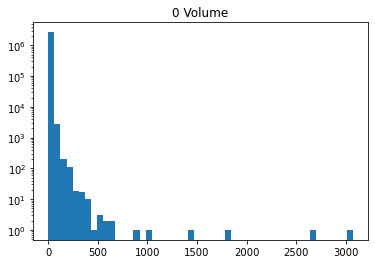

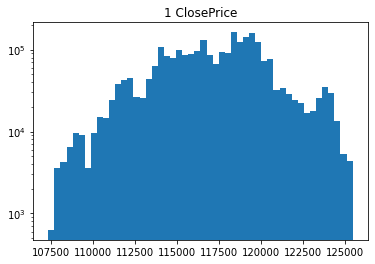

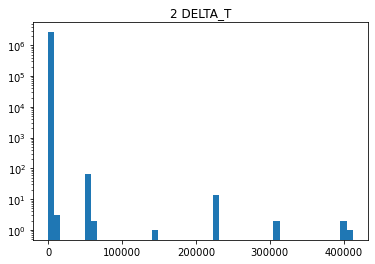

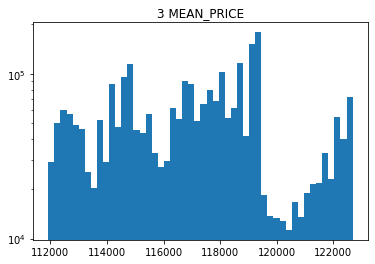

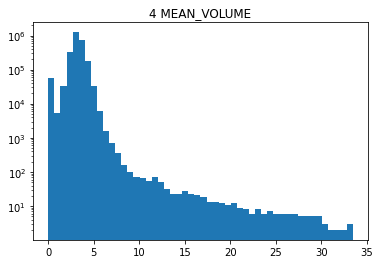

In [86]:
for i in range(5):
    plt.title(str(i) + " "+df.columns[i])
    plt.hist(data[...,i], 50)
    plt.yscale("log")
    plt.show()

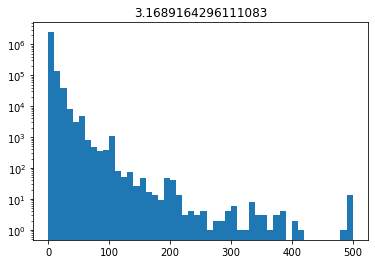

In [87]:
plt.title(data[...,0].mean())
plt.hist( np.clip(data[...,0], 0, 500), 50)
plt.yscale("log")
plt.show()

In [ ]:
# Normalização dos dados
# Volume: média=1
# ClosePrice: minmax
# Delta_t: Sem normalização
# Mean_price: minmax (na escala do ClosePrice)
# Mean_Volume: média=1 (na escala do Volume)

In [90]:
data = df.to_numpy().copy()

#Volumes:
mean_volumes = data[...,0].mean().copy()
print(mean_volumes)
data[...,0] = data[...,0]/mean_volumes
data[...,4] = data[...,4]/mean_volumes

#Prices:
max_price = data[...,1].max()
min_price = data[...,1].min()
data[...,1] = (data[...,1]-min_price)/(max_price-min_price)
data[...,3] = (data[...,3]-min_price)/(max_price-min_price)


3.1689164296111083


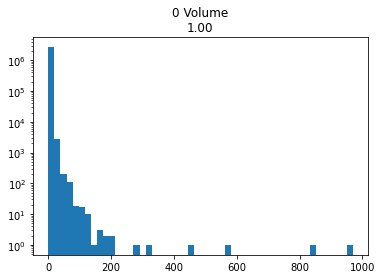

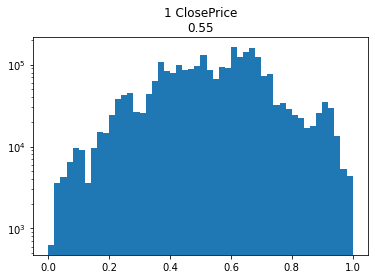

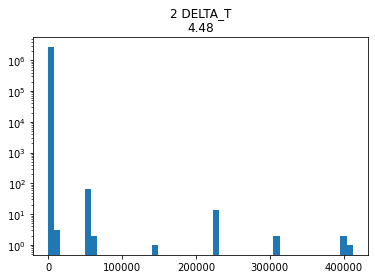

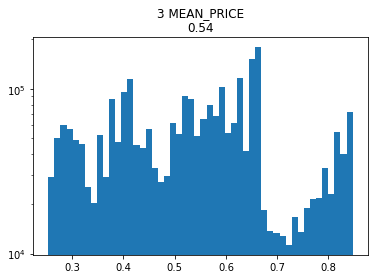

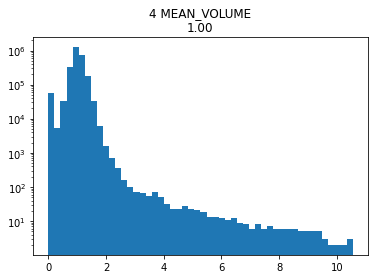

In [95]:
for i in range(5):
    plt.title(str(i) + " "+df.columns[i] + "\n" + f"{data[...,i].mean():.2f}")
    plt.hist(data[...,i], 50)
    plt.yscale("log")
    plt.show()

In [100]:
cut = int(len(data)*0.9)
data_train = data[:cut]
data_test = data[cut:]
len(data_train), len(data_test)

(2384251, 264917)

In [108]:
random.randint(1,5)

1

In [404]:
def generator(d, window_size=100, future_deep=5, jitter=0):
    i = window_size
    while True:
        print(i)
        yield d[i-window_size:i], d[i:i+future_deep,1]
        
        if jitter!=0:
            i+=random.randint(1,jitter+1)
        else:
            i+=1
        if i >= (len(d)-future_deep):
            i = window_size

In [405]:
train_g = generator(data_train[20000:], 1000, future_deep=20, jitter=30)


1000


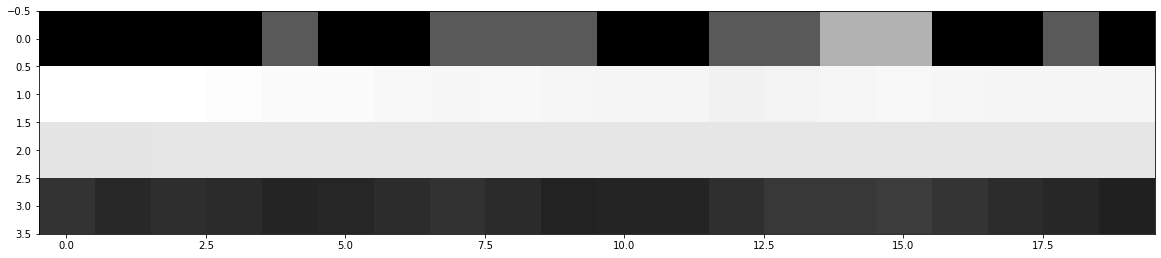

In [406]:
X, Y = next(train_g)
plt.figure(figsize=(20,20))
plt.imshow(cv2.resize(X.T,(20,5))[[0,1,3,4],:], cmap="gray")

In [407]:
Y.shape

(20,)

1007


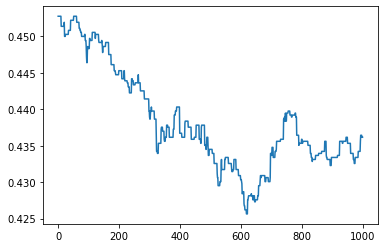

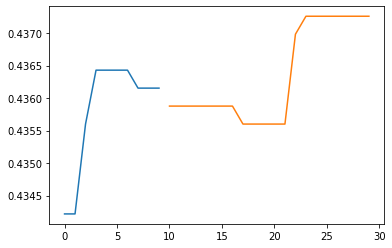

In [408]:
X, Y = next(train_g)
plt.plot(X[...,1])
plt.show()
plt.plot(X[...,1][-10:])
plt.plot(range(10,10+len(Y)),Y)

In [409]:
X.shape, Y.shape

((1000, 5), (20,))

In [ ]:
X.shape

In [412]:
model = Sequential()

In [427]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Initialize the model
model = Sequential()

# Add five Conv2D layers
# Since one of the spatial dimensions (5) is much smaller than the other,
# you might want to use a kernel that spans the entire width of 5
# and only moves along the height (1000).
model.add(Conv2D(filters=64, kernel_size=(30, 5), activation='relu', input_shape=(1000, 5, 1)))
model.add(Conv2D(filters=64, kernel_size=(30, 1), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(30, 1), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(30, 1), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(30, 1), activation='relu'))

# Flatten the output of the conv layers to feed into the dense layers
model.add(Flatten())

# Add two dense layers
#model.add(Dense(100, activation='relu'))
#model.add(Dense(50, activation='relu'))

# Output layer with 20 units
#model.add(Dense(20, activation='softmax'))  # Use softmax for classification or another activation for regression

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy')  # Use the appropriate loss function for your task

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 971, 1, 64)        9664      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 942, 1, 64)        122944    
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 913, 1, 64)        122944    
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 884, 1, 64)        122944    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 855, 1, 64)        122944    
_________________________________________________________________
flatten_1 (Flatten)          (None, 54720)             0         
Total params: 501,440
Trainable params: 501,440
Non-trainable params: 0
_______________________________________________

In [219]:
for i in range(20):
    X, Y = next(g)
    print(X[-1,1], Y)

4864
0.49972360420121614 0.4994472084024323
4870
0.5 0.5
4893
0.49917081260364843 0.4994472084024323
4920
0.4994472084024323 0.49917081260364843
4941
0.49889441680486457 0.49889441680486457
4966
0.498065229408513 0.498065229408513
4996
0.4994472084024323 0.4994472084024323
4997
0.4994472084024323 0.49972360420121614
5004
0.5002763957987839 0.5002763957987839
5005
0.5002763957987839 0.5002763957987839
5019
0.4994472084024323 0.5
5027
0.49972360420121614 0.49972360420121614
5031
0.49917081260364843 0.49917081260364843
5032
0.49917081260364843 0.49889441680486457
5057
0.4986180210060807 0.4986180210060807
5088
0.49834162520729686 0.49834162520729686
5102
0.496130458817026 0.49585406301824214
5117
0.49585406301824214 0.49585406301824214
5129
0.4972360420121614 0.4972360420121614
5131
0.4972360420121614 0.4972360420121614


In [ ]:
plt.imshow(X[...,])

In [1]:
!pip install dlib
import dlib

In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=bf92497fed846044879f729c36903e441c21bf9c64ed4fdbca7176ec9f839fb3
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [13]:
import face_recognition

In [4]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-a.tgz

--2024-03-31 23:29:49--  http://vis-www.cs.umass.edu/lfw/lfw-a.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14486641 (14M) [application/x-gzip]
Saving to: ‘lfw-a.tgz’

lfw-a.tgz           100%[===================>]  13.82M  1.67MB/s    in 10s     

2024-03-31 23:30:00 (1.32 MB/s) - ‘lfw-a.tgz’ saved [14486641/14486641]



In [9]:
!tar -xzf lfw-a.tgz

In [14]:
all_files = glob("./lfw/**/*.*", recursive=True)

In [15]:
faces = {}
for f in all_files[:]:
  k = f.split(os.sep)[-2]
  try:
    faces[k]+=[f]
  except:
    faces[k]=[f]


In [16]:
for k in list(faces.keys()):
  if len(faces[k])<2:
    faces.pop(k, None)
    #print(k)

In [17]:
faces.keys()

dict_keys(['Aaron_Peirsol', 'Aaron_Sorkin', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdullah', 'Abdullah_al-Attiyah', 'Abdullah_Gul', 'Abdullatif_Sener', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adrian_McPherson', 'Adrian_Nastase', 'Adrien_Brody', 'Ahmad_Masood', 'Ahmed_Chalabi', 'Ahmet_Necdet_Sezer', 'Aicha_El_Ouafi', 'Aitor_Gonzalez', 'Ai_Sugiyama', 'Akbar_Hashemi_Rafsanjani', 'Akhmed_Zakayev', 'Alan_Ball', 'Alan_Greenspan', 'Alan_Mulally', 'Alastair_Campbell', 'Alberto_Fujimori', 'Alberto_Ruiz_Gallardon', 'Albert_Costa', 'Albrecht_Mentz', 'Aldo_Paredes', 'Alec_Baldwin', 'Alejandro_Atchugarry', 'Alejandro_Avila', 'Alejandro_Toledo', 'Aleksander_Kwasniewski', 'Alexander_Downer', 'Alexander_Losyukov', 'Alexander_Rumyantsev', 'Alexandra_Stevenson', 'Alexandra_Vodjanikova', 'Alex_Barros', 'Alex_Penelas', 'Alex_Sink', 'Alice_Fisher', 'Alicia_Silverstone', 'Alimzhan_Tokhtakhounov', 'A

In [18]:
embeddings = {_:[] for _ in faces.keys()}
for k in faces.keys():
  print(k)
  for f in faces[k]:
    try:
      embeddings[k] += [face_recognition.face_encodings(face_recognition.load_image_file(f))[0]]
    except:
      embeddings[k] += [None]


Aaron_Peirsol
Aaron_Sorkin
Abdel_Nasser_Assidi
Abdoulaye_Wade
Abdullah
Abdullah_al-Attiyah
Abdullah_Gul
Abdullatif_Sener
Abel_Pacheco
Abid_Hamid_Mahmud_Al-Tikriti
Adam_Sandler
Adam_Scott
Adel_Al-Jubeir
Adolfo_Aguilar_Zinser
Adolfo_Rodriguez_Saa
Adrian_McPherson
Adrian_Nastase
Adrien_Brody
Ahmad_Masood
Ahmed_Chalabi
Ahmet_Necdet_Sezer
Aicha_El_Ouafi
Aitor_Gonzalez
Ai_Sugiyama
Akbar_Hashemi_Rafsanjani
Akhmed_Zakayev
Alan_Ball
Alan_Greenspan
Alan_Mulally
Alastair_Campbell
Alberto_Fujimori
Alberto_Ruiz_Gallardon
Albert_Costa
Albrecht_Mentz
Aldo_Paredes
Alec_Baldwin
Alejandro_Atchugarry
Alejandro_Avila
Alejandro_Toledo
Aleksander_Kwasniewski
Alexander_Downer
Alexander_Losyukov
Alexander_Rumyantsev
Alexandra_Stevenson
Alexandra_Vodjanikova
Alex_Barros
Alex_Penelas
Alex_Sink
Alice_Fisher
Alicia_Silverstone
Alimzhan_Tokhtakhounov
Alison_Lohman
Ali_Abbas
Ali_Khamenei
Ali_Naimi
Allen_Iverson
Allison_Janney
Allyson_Felix
Alvaro_Noboa
Alvaro_Silva_Calderon
Alvaro_Uribe
Al_Davis
Al_Gore
Al_Pacino
A

In [19]:
len(embeddings["Arnold_Schwarzenegger"])+len(embeddings["Angelina_Jolie"])

62

In [20]:
embs = np.array(embeddings["Arnold_Schwarzenegger"]+embeddings["Angelina_Jolie"]+embeddings["Al_Pacino"]+embeddings["Al_Gore"])
embs.shape

(73, 128)

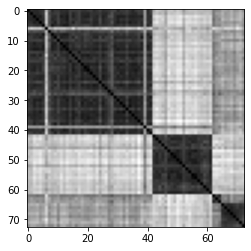

In [21]:
plt.imshow(np.array([ ((embs-_)**2).sum(axis=1) for _ in embs]), cmap="gray")

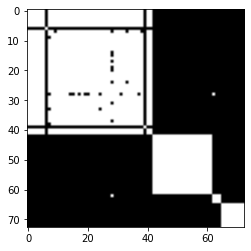

In [22]:
plt.imshow(np.array([ ((embs-_)**2).sum(axis=1) for _ in embs])<0.4, cmap="gray")